In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [781]:
def diff_summ(row):
    return (np.abs((np.diff(row))) <= 0.05).sum()

def dispersion(row):
    return (np.diff(row)).var()

In [783]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/779914/fen_train.csv')
df = df.drop('signal_id', axis=1)

In [784]:
df

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p120,p121,p122,p123,p124,p125,p126,p127,p128,label
0,-0.177789,-0.081874,-0.096131,-0.099436,-0.098867,-0.105427,-0.083472,-0.074000,-0.065275,-0.061691,...,-0.068265,-0.059327,-0.013739,0.009359,0.009645,0.070163,0.108443,0.127638,0.099169,0
1,0.010337,0.010733,0.117607,0.259589,0.339589,0.329296,0.281260,0.115658,-0.172955,-0.247284,...,0.370135,0.344097,0.158927,-0.102145,-0.301141,-0.148649,0.263631,0.480440,0.420327,0
2,-0.221846,-0.247773,-0.187847,-0.181616,-0.108799,-0.099480,-0.083244,-0.054944,-0.100919,-0.067735,...,-0.086089,-0.080394,-0.089625,-0.122950,-0.074273,-0.018595,0.054752,0.097544,0.067837,0
3,0.411835,0.513823,0.558802,0.380244,0.210830,0.174093,0.102772,-0.051933,-0.237179,-0.245491,...,0.113856,0.014483,-0.112094,-0.133700,-0.024104,-0.042590,-0.062838,-0.078137,-0.194478,0
4,0.221770,-0.026863,-0.249447,-0.340728,-0.288676,-0.207364,-0.155768,-0.091768,-0.119012,-0.149473,...,-0.216549,-0.167078,-0.077491,-0.115439,-0.126838,-0.087323,-0.115734,-0.102995,-0.098657,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,0.411055,0.168638,-0.198538,-0.300685,0.056328,0.617390,0.722862,0.370691,-0.013178,-0.265624,...,-0.244818,-0.192781,-0.172304,-0.145502,-0.125380,-0.012973,0.055567,0.017957,0.104189,0
650,0.104295,0.109067,0.045116,-0.033823,-0.072836,-0.054253,-0.014003,0.027218,0.054011,0.020000,...,-0.016502,-0.022746,-0.041478,-0.011162,-0.018928,-0.004817,0.032872,0.027806,0.033331,0
651,-0.104234,-0.085259,-0.043942,-0.030790,0.026148,0.028789,0.004455,0.058006,0.125277,0.238481,...,-0.159490,-0.126357,-0.094226,-0.072689,-0.132456,-0.135855,-0.079241,-0.015215,0.021913,0
652,0.031189,0.051451,0.176866,0.262605,0.201261,0.132246,-0.044051,-0.280172,-0.340040,-0.295317,...,-0.138272,-0.143904,-0.134502,-0.112658,-0.045430,0.038033,0.091223,0.180421,0.522160,0


In [785]:
new_features_df = pd.DataFrame()

In [786]:
new_features_df['row_diff_summ'] = df.iloc[:, :-1].apply(diff_summ, axis=1).copy()
new_features_df['row_dispersion'] = df.iloc[:, :-1].apply(dispersion, axis=1).copy()

In [787]:
# Computing the first and second derivatives
first_derivative = df.iloc[:, :-1].diff(axis=1)
first_derivative = first_derivative.iloc[:, 1:]

In [788]:
abs_first_derivative = np.abs(first_derivative)

# Calculating the Mean and Variance of a Derived Module
mean_abs_derivative = abs_first_derivative.mean(axis=1)
var_abs_derivative = abs_first_derivative.std(axis=1)

new_features_df['mean_abs_derivative'] =  mean_abs_derivative
new_features_df['var_abs_derivative'] = var_abs_derivative

# Calculate the number of derivatives close to zero (by a given threshold)
close_to_threshold = np.sum( (abs_first_derivative.iloc[:,:].sort_values(by=list(abs_first_derivative.columns[:])) <=
                              (mean_abs_derivative.std()  + mean_abs_derivative.min() + mean_abs_derivative.mean()) / 2.718) , axis=1 )

new_features_df['close_to_threshold'] = close_to_threshold/1000

new_features_df['label'] = df['label']

In [789]:
new_features_df

,row_diff_summ,row_dispersion,mean_abs_derivative,var_abs_derivative,close_to_threshold,label
0,70,0.010562,0.073193,0.072462,0.070,0
1,48,0.020160,0.103716,0.097409,0.048,0
2,66,0.010166,0.072516,0.070364,0.066,0
3,56,0.012968,0.086290,0.074762,0.057,0
4,68,0.007962,0.064787,0.061649,0.069,0
...,...,...,...,...,...,...
649,47,0.020328,0.103223,0.098771,0.047,0
650,95,0.003085,0.039178,0.039528,0.096,0
651,69,0.009321,0.067738,0.069073,0.069,0
652,41,0.019968,0.105800,0.094121,0.041,0


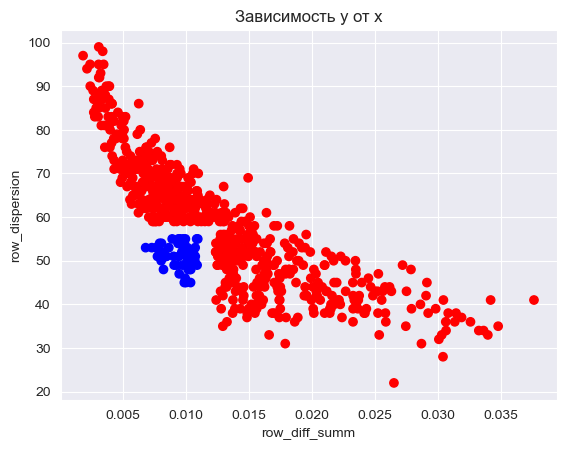

In [791]:
colors = {0: 'red', 1: 'blue'}
plt.scatter(new_features_df['row_dispersion'], new_features_df['row_diff_summ'], c=df['label'].apply(lambda x: colors[x]))

plt.title('Dependency y on x')
plt.xlabel('row_diff_summ')
plt.ylabel('row_dispersion')
plt.show()

In [716]:
new_features_df.shape

(654, 3)

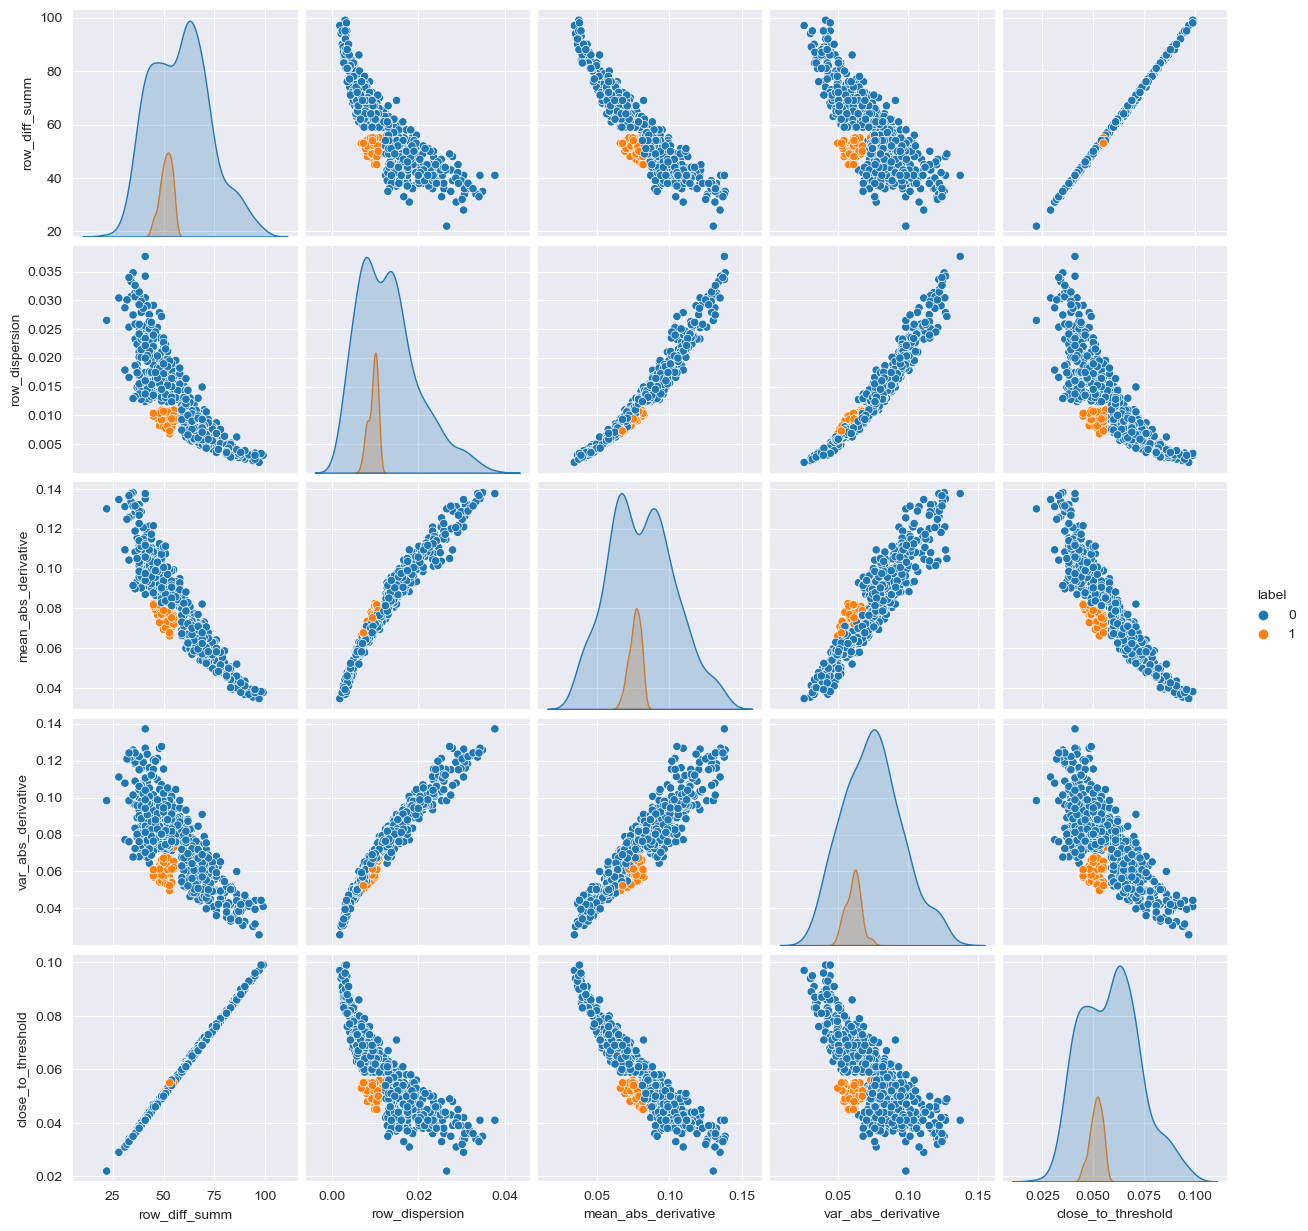

In [792]:
sns.pairplot(new_features_df, hue='label')
plt.show()

In [793]:
new_features_df['label'].value_counts()

0    603
1     51
Name: label, dtype: int64

In [719]:
# Make new DataFrame
new_df = new_features_df.copy()

class_0 = new_df[new_df['label'] == 0]
class_1 = new_df[new_df['label'] == 1]

# Select a random 600 entries from a larger class
class_0_sample = class_0.sample(600, random_state=42)

# Combine reduced class 0 with class 1 and mix
balanced_df = pd.concat([class_0_sample, class_1])
balanced_df = shuffle(balanced_df, random_state=42)

# Divide balanced DataFrame into training and test samples using stratification
X_balanced = balanced_df.drop(columns=["label"])

label_encoder = LabelEncoder()
y_balanced = label_encoder.fit_transform(balanced_df['label'])
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, stratify=y_balanced, random_state=42)

In [720]:
# numeric features normalization
numeric_features = X_balanced.columns.to_list()
numeric_features_idx = [X_train.columns.get_loc(col) for col in numeric_features]

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features)
])

In [721]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [722]:
# Create datasets and data loaders
X_train_tensor = torch.tensor(X_train_processed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_processed, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [723]:
class UserDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [724]:
train_dataset = UserDataset(X_train_tensor, y_train_tensor)
test_dataset = UserDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [725]:
# model creation
input_dim = X_train_processed.shape[1]
output_dim = len(np.unique(y_train))

In [726]:
X_train.shape[1] # for adjustment of second layer2

2

In [727]:
# lets define model architecture
class Net(nn.Module):
    def __init__(self, input_dim, output_dim):

        super(Net, self).__init__()
        self.layer1 = nn.Linear(input_dim, 8)
        self.layer2 = nn.Linear(8, 4)
        self.layer3 = nn.Linear(4, output_dim)
        self.dropout = nn.Dropout(0.1)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)
        # self.elu = nn.ELU(alpha=1.0)

    def forward(self, x):
        x = self.leaky_relu(self.layer1(x))
        x = self.dropout(x)
        x = self.leaky_relu(self.layer2(x))
        x = self.dropout(x)
        x = self.leaky_relu(self.layer3(x))
        return x

input_dim = X_train.shape[1]
output_dim = len(np.unique(y_balanced))

In [728]:
# early stopping module
class EarlyStopping:
    def __init__(self, patience=10, delta=0):
        self.patience = patience
        self.counter = 0
        self.best_score = None
        self.delta = delta

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                return True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0
        return False

    def save_checkpoint(self, val_loss, model):
        print(f"Validation loss decreased ({-self.best_score:.6f} --> {val_loss:.6f}). Saving model ...")
        torch.save(model.state_dict(), 'checkpoint.pt')


In [729]:
# make model, loss function and optimizer
model = Net(input_dim, output_dim)
criterion = nn.CrossEntropyLoss()

# optimizer = optim.Adam(model.parameters(), lr=0.01)
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.99)
# optimizer = optim.Adagrad(model.parameters(), lr=0.01)
# optimizer = optim.Adadelta(model.parameters(), lr=1.0, rho=0.9)
# optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

early_stopping = EarlyStopping(patience=50, delta=0.001)

In [730]:
# Training model with early stopping
num_epochs = 500
best_val_loss = None

In [731]:
%%time
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Calculate validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    # Calculate average losses
    train_loss = running_loss / len(train_loader)
    val_loss = val_loss / len(test_loader)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss}, Val Loss: {val_loss}")
    # Check early stopping
    if early_stopping(val_loss, model):
        print("Early stopping")
        break

Epoch 1/500, Train Loss: 0.4992305835088094, Val Loss: 0.43906527280807495
Validation loss decreased (0.439065 --> 0.439065). Saving model ...
Epoch 2/500, Train Loss: 0.4159315055922458, Val Loss: 0.3789116680622101
Validation loss decreased (0.378912 --> 0.378912). Saving model ...
Epoch 3/500, Train Loss: 0.3652590926279101, Val Loss: 0.33401275515556333
Validation loss decreased (0.334013 --> 0.334013). Saving model ...
Epoch 4/500, Train Loss: 0.33913123529208333, Val Loss: 0.30644287705421447
Validation loss decreased (0.306443 --> 0.306443). Saving model ...
Epoch 5/500, Train Loss: 0.3072104089354214, Val Loss: 0.287016886472702
Validation loss decreased (0.287017 --> 0.287017). Saving model ...
Epoch 6/500, Train Loss: 0.3043757657471456, Val Loss: 0.2753322947025299
Validation loss decreased (0.275332 --> 0.275332). Saving model ...
Epoch 7/500, Train Loss: 0.27793005174189284, Val Loss: 0.2650071918964386
Validation loss decreased (0.265007 --> 0.265007). Saving model ...
Ep

In [732]:
# Load the best model from checkpoint
model.load_state_dict(torch.load('checkpoint.pt'))

# evaluation of model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print("Accuracy: {:.2f}%".format( correct / total * 100))

Accuracy: 100.00%


In [733]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/779914/fen_test.csv')

In [734]:
data.shape

(432, 129)

In [735]:
data_test = data.copy()
data_test = data_test.drop('signal_id', axis=1)
data_test.shape

(432, 128)

In [794]:
new_dataset_test = pd.DataFrame()

In [795]:
new_dataset_test['row_diff_summ'] = data_test.apply(diff_summ, axis=1).copy()
new_dataset_test['row_dispersion'] = data_test.apply(dispersion, axis=1).copy()

In [796]:
first_derivative_ = data_test.diff(axis=1)
first_derivative_ = first_derivative_.iloc[:, 1:]
abs_first_derivative_ = np.abs(first_derivative_)

In [797]:
mean_abs_derivative_ = abs_first_derivative_.mean(axis=1)
var_abs_derivative_ = abs_first_derivative_.var(axis=1)

new_dataset_test['mean_abs_derivative'] = mean_abs_derivative_
new_dataset_test['var_abs_derivative'] = var_abs_derivative_

close_to_threshold_ = np.sum( (abs_first_derivative_.iloc[:,:].sort_values(by=list(abs_first_derivative_.columns[:])) <= (mean_abs_derivative_.std()  + mean_abs_derivative_.min() + mean_abs_derivative_.mean()) / 2.718) , axis=1) # 0.0495 0.002467

new_dataset_test['close_to_threshold'] = close_to_threshold_/1000

new_dataset_test['var_abs_derivative_X_mean_abs_derivative'] = new_dataset_test['var_abs_derivative'] * new_dataset_test['mean_abs_derivative']
# new_dataset_test = new_dataset_test.drop(['var_abs_derivative', 'mean_abs_derivative'], axis=1)

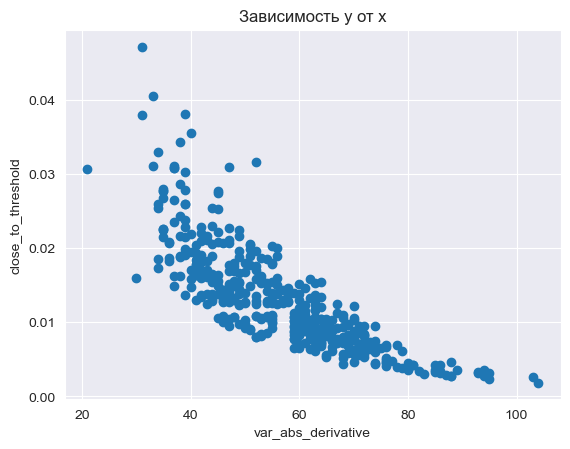

In [798]:
plt.scatter(new_dataset_test['row_diff_summ'], new_dataset_test['row_dispersion'])

plt.title('Зависимость y от x')
plt.xlabel('var_abs_derivative')
plt.ylabel('close_to_threshold')
plt.show()

In [739]:
X_train.columns.tolist()

['row_div_f2', 'row_div_f1']

In [740]:
correct_order = X_train.columns.tolist()
new_dataset_test = new_dataset_test[correct_order]

In [741]:
new_dataset_test.shape

(432, 2)

In [742]:
X_new_processed = preprocessor.transform(new_dataset_test)

In [743]:
X_new_tensor = torch.tensor(X_new_processed, dtype=torch.float32)

In [744]:
model.eval()
with torch.no_grad():
    outputs = model(X_new_tensor)
    _, predicted = torch.max(outputs, 1)

# Convert predicted labels back into original user IDs
predicted_user_ids = label_encoder.inverse_transform(predicted.numpy())

print(sum(predicted_user_ids))
print("Predicted user IDs:", predicted_user_ids)

32
Predicted user IDs: [0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [745]:
# Assembly of the validation dataset on the platform
result_V_4 = pd.DataFrame()
result_V_4['signal_id'] = data['signal_id']
result_V_4['label'] = predicted_user_ids
result_V_4['label'].value_counts()

0    400
1     32
Name: label, dtype: int64

In [746]:
result_V_4.to_csv('result_V_10_4.csv', index=False) # accuracy=1.0